# Deep learning Assignment : Fully connected layers
- Authors : Skander Zoghlami, Moez Saidi, Mohamed koutaiba msadaa
- Summary : In this notebook we'll use keras's fully connected layers to test the performance on toy data and compare them to the perceptron algorithms, then we'll ue it on iris,digits and faces datasets to investigate the limitations of these networks.

# Libraries used :
- here we put all the libraries used throughout the project so that it can be perfectly launched on a virtual environement.

In [ ]:
!pip install numpy==1.19.5 # for mathemathical operations and processing the data before feeding them to the network
!pip install scikit-learn==1.0.1 # to call machine learning functions and algorithms
!pip install matplotlib==3.2.2 # to plot the datasets
!pip install keras==2.7.0 # to define and compile models
!pip install tensorflow==2.7.0 # To use tensors

In [ ]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
from sklearn.datasets import load_digits
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.datasets import fetch_olivetti_faces

# Experiments

## Experiement 1 : Toy Dataset
- Here we will use the same toy dataset used in the first assignment which gave 0.98 accuracy using the perceptron algorithm

In [ ]:
def generate_data(mu1, mu2, sigma1, sigma2, n, input_size):
  ''' This function generates the data using standard deviation and mean values'''
  X1 = sigma1 * np.random.randn(n//2,input_size) + mu1
  Y1 = -1*np.ones(n//2, dtype=int)
  X2 = sigma2 * np.random.randn(n//2,input_size) + mu2
  Y2 = np.ones(n//2, dtype=int)
  X =  np.concatenate((X1,X2))
  y = np.concatenate((Y1,Y2))
  return X,y

In [ ]:
def plot_dataset(input,target,title="Plot"):
  ''' this function is used to plot the dataset in 2D'''
  fig, ax = plt.subplots()
  scatter = plt.scatter(input[:,0], input[:,1], c=target, cmap="autumn")
  plt.title(title)
  legend = ax.legend(*scatter.legend_elements())
  ax.add_artist(legend)
  plt.gca().set_ylim([-5, 5])
  plt.show()

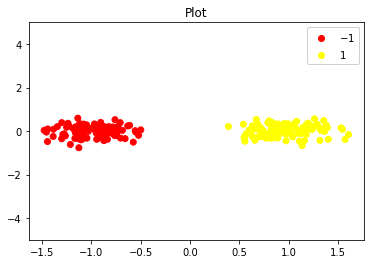

In [ ]:
sigma1 = sigma2 = 0.25
input_size = 2
mu1 = np.array([-1, 0])
mu2 = np.array([1, 0])

X,y = generate_data(mu1, mu2, sigma1, sigma2, 250 , input_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,shuffle=True)
plot_dataset(X_train, y_train)

- Now we will define the model, since the data is linearly separable we wont be needing multiple layers so a simple modelwith 1 dense layer will be enough.

In [ ]:
# Defining the model
model = Sequential([
    Dense(2, input_dim=2, activation='softmax'),
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_524 (Dense)           (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Transforming the labels to categories
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Training the model
model.fit(X_train, y_train_cat, epochs=20, batch_size=4)
print('Model acccuracy:',model.evaluate(X_test,y_test_cat)[1])

Epoch 1/20
50/50 [==============================] - 0s 1ms/step - loss: 0.3408 - accuracy: 1.0000
Epoch 2/20
50/50 [==============================] - 0s 1ms/step - loss: 0.3267 - accuracy: 1.0000
Epoch 3/20
50/50 [==============================] - 0s 1ms/step - loss: 0.3133 - accuracy: 1.0000
Epoch 4/20
50/50 [==============================] - 0s 1ms/step - loss: 0.3005 - accuracy: 1.0000
Epoch 5/20
50/50 [==============================] - 0s 1ms/step - loss: 0.2884 - accuracy: 1.0000
Epoch 6/20
50/50 [==============================] - 0s 2ms/step - loss: 0.2770 - accuracy: 1.0000
Epoch 7/20
50/50 [==============================] - 0s 1ms/step - loss: 0.2661 - accuracy: 1.0000
Epoch 8/20
50/50 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 1.0000
Epoch 9/20
50/50 [==============================] - 0s 1ms/step - loss: 0.2460 - accuracy: 1.0000
Epoch 10/20
50/50 [==============================] - 0s 1ms/step - loss: 0.2367 - accuracy: 1.0000
Epoch 11/20
50/50 [

- We can see that the model has  achieved perfect accuracy which is predictable since the data are linearly serparable.

##Experiment 2: Iris Dataset:
- Here we will load the iris dataset from scikit-learn and then test multiple models by changing the depth of the network each time as well as the number of neurones in each layer

([], <a list of 0 Text major ticklabel objects>)

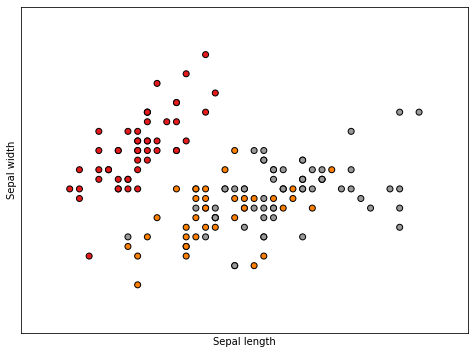

In [ ]:
iris = datasets.load_iris()
# extract the first two features.
X = iris.data[:, :2]  
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [ ]:
def recall(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
def create_keras_model(input_dim, output_dim, nodes, layers=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(layers):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy', 
                               tf.keras.metrics.Precision(), 
                               tf.keras.metrics.Recall(), 
                               tf.keras.metrics.AUC()])
                      
        return model
    return create_model
# Creating multiple models
# Output dim == 3 , we have 3 classes
models = [create_keras_model(X_train.shape[1], 3, 10, i, 'model_{}'.format(i)) 
          for i in range(1, 5)]

for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_305 (Dense)           (None, 10)                30        
                                                                 
 dense_306 (Dense)           (None, 3)                 33        
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_307 (Dense)           (None, 10)                30        
                                                                 
 dense_308 (Dense)           (None, 10)                110       
                                                                 
 dense_309 (Dense)           (None, 3)        

In [ ]:
for created_model in models:
    model = created_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, y_train,
                                 batch_size=10,
                                 epochs=150,
                                 verbose=0
                                 )
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('Test precision:', score[2])
    print('Test recall:', score[3])
    print('Test f1_score:', score[4])

Model name: model_1
Test loss: 0.7419240474700928
Test accuracy: 0.699999988079071
Test precision: 0.8461538553237915
Test recall: 0.36666667461395264
Test f1_score: 0.9049999713897705
Model name: model_2
Test loss: 0.5111734867095947
Test accuracy: 0.8333333134651184
Test precision: 0.8846153616905212
Test recall: 0.7666666507720947
Test f1_score: 0.9524999856948853
Model name: model_3
Test loss: 0.4358949661254883
Test accuracy: 0.800000011920929
Test precision: 0.800000011920929
Test recall: 0.800000011920929
Test f1_score: 0.9474999308586121
Model name: model_4
Test loss: 0.4128485918045044
Test accuracy: 0.8666666746139526
Test precision: 0.8666666746139526
Test recall: 0.8666666746139526
Test f1_score: 0.9558332562446594


- We can see that the best model (model 4 ) has achieved 0.86 accuracy.

##Experiment 3: Digits dataset
- Here we will do the same operation as before: we define multiple models with different hyperparameters and test their performances on the digits datasets.

<Figure size 432x288 with 0 Axes>

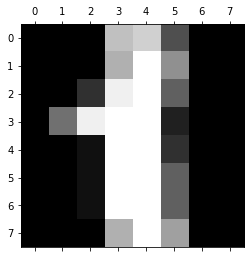

In [ ]:
digits = load_digits()
plt.gray()
plt.matshow(digits.images[1])
plt.show()

In [ ]:
yDigit = digits.target
x_digits = digits.images.reshape((len(digits.images), -1))
print(yDigit.shape)
print(x_digits.shape)

(1797,)
(1797, 64)


In [ ]:
y_digits = np_utils.to_categorical(digits.target,10)


In [ ]:
train_img, test_img, train_label, test_label = train_test_split(x_digits, y_digits, test_size=0.2, random_state=0)

In [ ]:
def plot_sample(X, y, index):
    plt.imshow(X[index])        
    plt.xlabel(y[index])

In [ ]:
print(train_img.shape)
print(train_label.shape)

(1437, 64)
(1437, 10)


In [ ]:
# Creating multiple models
# Output dim == 10 , we have 10 classes
models = [create_keras_model(train_img.shape[1], 10, 10, i, 'model_{}'.format(i)) 
          for i in range(1, 6)]
for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_355 (Dense)           (None, 10)                650       
                                                                 
 dense_356 (Dense)           (None, 10)                110       
                                                                 
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_357 (Dense)           (None, 10)                650       
                                                                 
 dense_358 (Dense)           (None, 10)                110       
                                                                 
 dense_359 (Dense)           (None, 10)     

In [ ]:
for created_model in models:
    model = created_model()
    print('Model name:', model.name)
    history_callback = model.fit(train_img, train_label,
                                 batch_size=10,
                                 epochs=150,
                                 verbose=0
                                 )
    score = model.evaluate(test_img, test_label, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('Test precision:', score[2])
    print('Test recall:', score[3])
    print('Test f1_score:', score[4])

Model name: model_1
Test loss: 0.3184371888637543
Test accuracy: 0.9611111283302307
Test precision: 0.9611111283302307
Test recall: 0.9611111283302307
Test f1_score: 0.9906310439109802
Model name: model_2
Test loss: 0.34279075264930725
Test accuracy: 0.9388889074325562
Test precision: 0.9388889074325562
Test recall: 0.9388889074325562
Test f1_score: 0.9859173893928528
Model name: model_3
Test loss: 0.47102466225624084
Test accuracy: 0.9527778029441833
Test precision: 0.9554317593574524
Test recall: 0.9527778029441833
Test f1_score: 0.984311580657959
Model name: model_4
Test loss: 0.1776832640171051
Test accuracy: 0.9722222089767456
Test precision: 0.9722222089767456
Test recall: 0.9722222089767456
Test f1_score: 0.9921982288360596
Model name: model_5
Test loss: 0.42588964104652405
Test accuracy: 0.9361110925674438
Test precision: 0.9359331727027893
Test recall: 0.9333333373069763
Test f1_score: 0.9870708584785461


- Here we can see that the best model (Model 4) has achieved an accuracy of 0.97 

##Experiment 4: Face Data set

In [ ]:
data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
print(data.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [ ]:
faces = data.images
target = data.target

In [ ]:
#Total class number equal to 40
all_classes = np.unique(target)
all_classes.sort()
all_classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [ ]:
faces = faces.reshape((len(faces), -1))

In [ ]:
face_target = np_utils.to_categorical(target, 40)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(faces, face_target, test_size=0.2, stratify=target, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(320, 4096)
(320, 40)


In [ ]:
# Creating multiple models
# Output dim == 40 , we have 40 classes
models = [create_keras_model(X_train.shape[1], 40, 50, i, 'model_{}'.format(i)) 
          for i in range(5, 10)]
for create_model in models:
    create_model().summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_439 (Dense)           (None, 50)                204850    
                                                                 
 dense_440 (Dense)           (None, 50)                2550      
                                                                 
 dense_441 (Dense)           (None, 50)                2550      
                                                                 
 dense_442 (Dense)           (None, 50)                2550      
                                                                 
 dense_443 (Dense)           (None, 50)                2550      
                                                                 
 dense_444 (Dense)           (None, 40)                2040      
                                                                 
Total params: 217,090
Trainable params: 217,090
Non-trainab

In [ ]:
for created_model in models:
    model = created_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, y_train,
                                 batch_size=10,
                                 epochs=150,
                                 verbose=0
                                 )
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('Test precision:', score[2])
    print('Test recall:', score[3])
    print('Test f1_score:', score[4])

Model name: model_5
Test loss: 2.3289122581481934
Test accuracy: 0.375
Test precision: 0.5
Test recall: 0.13750000298023224
Test f1_score: 0.9220373630523682
Model name: model_6
Test loss: 3.094635486602783
Test accuracy: 0.13750000298023224
Test precision: 0.0
Test recall: 0.0
Test f1_score: 0.833038866519928
Model name: model_7
Test loss: 2.6388237476348877
Test accuracy: 0.44999998807907104
Test precision: 0.5263158082962036
Test recall: 0.375
Test f1_score: 0.9084475040435791
Model name: model_8
Test loss: 2.479642152786255
Test accuracy: 0.44999998807907104
Test precision: 0.5909090638160706
Test recall: 0.32499998807907104
Test f1_score: 0.9189342856407166
Model name: model_9
Test loss: 3.688880443572998
Test accuracy: 0.02500000037252903
Test precision: 0.0
Test recall: 0.0
Test f1_score: 0.5


- Here we can see that the models aren't very performant when it comes to images, that's why a better solution is proposed which is CNN.